<a href="https://colab.research.google.com/github/austinkinnrubin/ce114/blob/master/CE114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CE 114 Problem Set 1#

Water release  optimization using Backward Moving Dynamic Programming

---



## Importing libraries

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%timeit

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Data initialization

year = [1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938]

annual_inflow = [17.26,10.99,13.69,9.2,23.8,17.98,13.21,5.74,15.99,11.76,23.83,16.76,8.4,13.52,6.1,13.12,8.94,8.63,16.59,17.35,13.33,31.83]

cumm_annual_inflow = [17.26,28.25,41.94,51.14,74.94,92.92,106.13,111.87,127.86,139.62,163.45,180.21,188.61,202.13,208.23,221.35,230.29,238.92,255.51,272.86,286.19,318.02]

cumm_annual_demand = [14.45545455,28.91090909,43.36636364,57.82181818,72.27727273,86.73272727,101.1881818,115.6436364,130.0990909,144.5545455,159.01,173.4654545,187.9209091,202.3763636,216.8318182,231.2872727,245.7427273,260.1981818,274.6536364,289.1090909,303.5645455,318.02]


In [0]:
year = np.array([1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938])

annual_inflow = np.array([17.26,10.99,13.69,9.2,23.8,17.98,13.21,5.74,15.99,11.76,23.83,16.76,8.4,13.52,6.1,13.12,8.94,8.63,16.59,17.35,13.33,31.83])

#cumm_annual_inflow = np.array([17.26,28.25,41.94,51.14,74.94,92.92,106.13,111.87,127.86,139.62,163.45,180.21,188.61,202.13,208.23,221.35,230.29,238.92,255.51,272.86,286.19,318.02])
#cumm_annual_demand = np.array([14.45545455,28.91090909,43.36636364,57.82181818,72.27727273,86.73272727,101.1881818,115.6436364,130.0990909,144.5545455,159.01,173.4654545,187.9209091,202.3763636,216.8318182,231.2872727,245.7427273,260.1981818,274.6536364,289.1090909,303.5645455,318.02])

In [0]:
demand = np.mean(annual_inflow)
cumm_annual_inflow = np.zeros(len(year))
cumm_annual_demand = np.zeros(len(year))
cumm_annual_inflow[0] = annual_inflow[0]
cumm_annual_demand[0] = demand
for i in range(0, 21):
    cumm_annual_inflow[i+1] = cumm_annual_inflow[i]+annual_inflow[i+1]
    cumm_annual_demand[i+1] = cumm_annual_demand[i] + demand
#print(cumm_annual_inflow)
#print(cumm_annual_demand)

## Graphing data with PyPlot

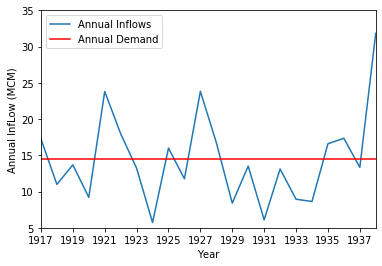

In [13]:
plt.plot(year,annual_inflow, label='Annual Inflows')
plt.axhline(demand, c='red', label='Annual Demand')
plt.axis([1917,1938,5,35])
plt.ylabel('Annual InfLow (MCM)')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.xticks(np.arange(min(year), max(year), 2.0))
plt.show()



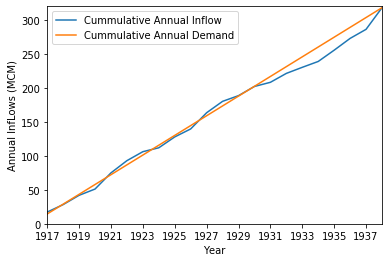

In [14]:
plt.plot(year, cumm_annual_inflow, label='Cummulative Annual Inflow')
plt.plot(year, cumm_annual_demand, label='Cummulative Annual Demand')
plt.axis([1917,1938,0,320])
plt.ylabel('Annual InfLows (MCM)')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.xticks(np.arange(min(year), max(year), 2.0))
plt.show()

#Sequent Peak Algorithm

In [31]:
rt = np.zeros(len(year))
st = np.zeros(len(year))
art = np.zeros(len(year))
smc = 28.02272727
smax = 0.5*smc
st[21] = smax
for i in range(21,0,-1):
  stdumm = st[i] - annual_inflow[i-1] + rt[i-1]
  if (stdumm<0):
    rt[i-1] = rt[i-1] + abs(stdumm)
  elif (stdumm>smax):
    rt[i-1] = rt[i-1] + stdumm - smax
  st[i-1] =  st[i] - annual_inflow[i-1] + rt[i-1]
print(st,'\n' ,rt)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.68136364 14.01136364] 
 [17.26       10.99       13.69        9.2        23.8        17.98
 13.21        5.74       15.99       11.76       23.83       16.76
  8.4        13.52        6.1        13.12        8.94        8.63
 16.59       16.66863637  0.          0.        ]
